In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
query = '''
SELECT datetime
FROM pageviews
WHERE uid NOT LIKE '%admin%';
'''

df = pd.io.sql.read_sql(query, conn)

используя Pandas, создайте новый фрейм данных, в котором подсчитываются посещения и группируются по дате

In [6]:
df['date']=pd.to_datetime(df['datetime']).dt.date

In [15]:
visits=df.groupby('date').size().reset_index(name='views')
visits.set_index('date', inplace=True)

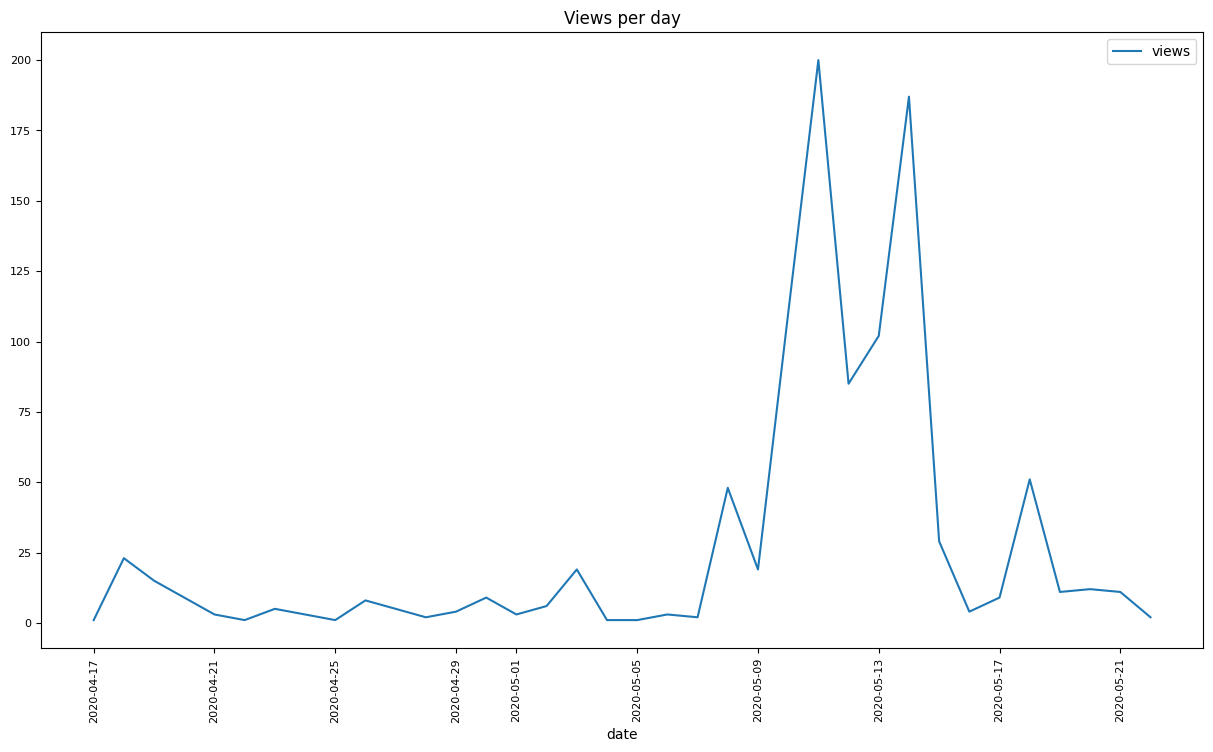

In [16]:
plot = visits.plot(title="Views per day", fontsize=8, figsize=(15,8), rot=90)

In [18]:
conn.close()

In [19]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2020-04-17 to 2020-05-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   views   33 non-null     int64
dtypes: int64(1)
memory usage: 1.6+ KB
